# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [103]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [11]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [17]:
df_apps = pd.read_csv('apps.csv')
df_apps.tail()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up
10840,Subway Surfers,GAME,4.50,27711703,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up


# Data Cleaning

In [21]:
df_apps.shape

(10841, 12)

In [27]:
df_apps.sample(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
7433,What was I in my Past Life,FAMILY,3.70,7453,6.50,"1,000,000",Free,0,Everyone,Entertainment,"December 19, 2017",4.1 and up
1666,DM Buddy » Learn Digital Marketing,FAMILY,5.00,3,1.70,500,Free,0,Everyone,Education,"July 11, 2017",4.1 and up
7468,Planner Pro-Personal Organizer,PRODUCTIVITY,4.00,10270,8.40,"1,000,000",Free,0,Everyone,Productivity,"March 23, 2018",4.0 and up
543,Guide to Nikon Df,PHOTOGRAPHY,NaN,1,0.65,10,Paid,$29.99,Everyone,Photography,"February 18, 2014",4.0.3 and up
6602,DS file,PRODUCTIVITY,4.10,10676,12.00,"1,000,000",Free,0,Everyone,Productivity,"May 23, 2018",4.1 and up


In [31]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


### Drop Unused Columns


In [39]:
df_apps = df_apps.drop(["Last_Updated", "Android_Ver"], axis=1)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings


In [49]:
df_apps["Rating"].isna().sum()

1474

In [55]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates


In [75]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [77]:
print(df_apps_clean[df_apps_clean.App == "Instagram"])

             App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10808  Instagram   SOCIAL    4.50  66577446      5.30  1,000,000,000  Free   
10809  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10810  Instagram   SOCIAL    4.50  66509917      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social  
10808     0           Teen  Social  
10809     0           Teen  Social  
10810     0           Teen  Social  


In [79]:
df_apps_clean = df_apps_clean.drop_duplicates(subset = ["App", "Type", "Price"])

In [81]:
#As Instagram is repeated 4 times with different review count
print(df_apps_clean[df_apps_clean.App == "Instagram"])

             App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social  


In [83]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps


In [87]:
highest_rated = df_apps_clean[df_apps_clean.Rating > 4.5]
highest_rated

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10682,Talking Tom Gold Run,GAME,4.60,2698348,78.00,"100,000,000",Free,0,Everyone,Action
10711,SHAREit - Transfer & Share,TOOLS,4.60,7790693,17.00,"500,000,000",Free,0,Everyone,Tools
10722,Google Duo - High Quality Video Calls,COMMUNICATION,4.60,2083237,3.50,"500,000,000",Free,0,Everyone,Communication
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools


# Find 5 Largest Apps in terms of Size (MBs)

In [91]:
df_apps_clean.sort_values("Size_MBs", ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...
2648,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.10,66,0.02,"1,000",Paid,$1.29,Everyone,Productivity
5798,ExDialer PRO Key,COMMUNICATION,4.50,5474,0.02,"100,000",Paid,$3.99,Everyone,Communication
2684,My baby firework (Remove ad),FAMILY,4.10,30,0.01,"1,000",Paid,$0.99,Everyone,Entertainment
7966,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,0.01,"1,000,000",Free,0,Everyone,Libraries & Demo


# Find the 5 App with Most Reviews

In [489]:
df_apps_clean.sort_values("Reviews", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue Estimates
10805,Facebook,SOCIAL,4.10,78158306,5.30,1000000000,Free,0.00,Teen,Social,0.00
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,1000000000,Free,0.00,Everyone,Communication,0.00
10806,Instagram,SOCIAL,4.50,66577313,5.30,1000000000,Free,0.00,Teen,Social,0.00
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,1000000000,Free,0.00,Everyone,Communication,0.00
10650,Clash of Clans,GAME,4.60,44891723,98.00,100000000,Free,0.00,Everyone 10+,Strategy,0.00
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,500000000,Free,0.00,Everyone,Tools,0.00
10835,Subway Surfers,GAME,4.50,27722264,76.00,1000000000,Free,0.00,Everyone 10+,Arcade,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,500000000,Free,0.00,Everyone,Tools,0.00
10584,Clash Royale,GAME,4.60,23133508,97.00,100000000,Free,0.00,Everyone 10+,Strategy,0.00


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [101]:
rating = df_apps_clean.Content_Rating.value_counts()
rating

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

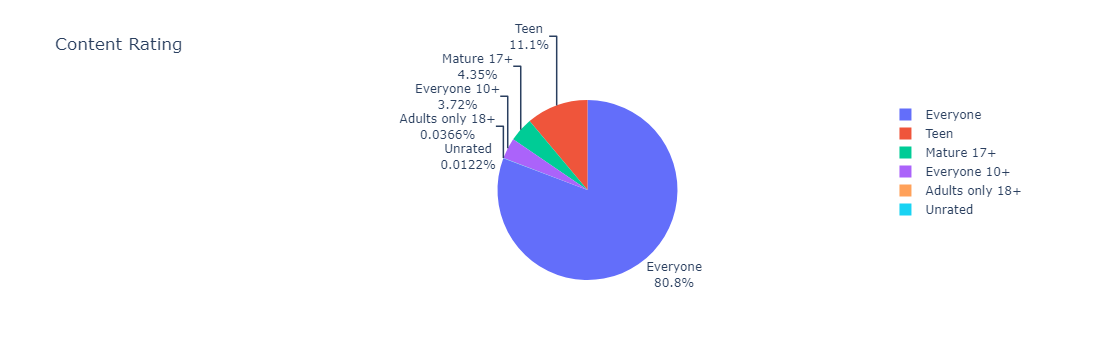

In [117]:
fig = px.pie(labels=rating.index, 
            values= rating.values,
            title = "Content Rating",
            names= rating.index)
fig.update_traces(textposition= "outside", textinfo = "percent + label")
fig.show()

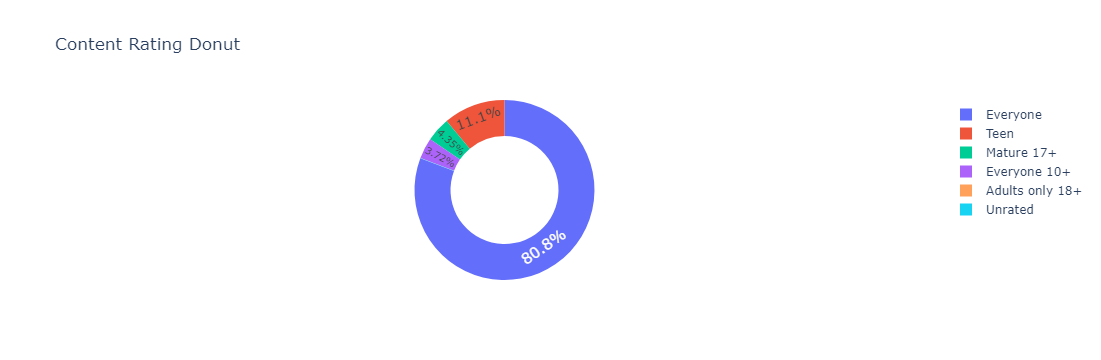

In [123]:
fig_donut = px.pie(labels = rating.index,
                  values = rating.values,
                  title = "Content Rating Donut",
                  names = rating.index,
                  hole=0.6)
fig_donut.update_traces(
    textposition = "inside",
    textfont_size = 15,
    textinfo = 'percent'
)
fig_donut.show()

# Numeric Type Conversion: Examine the Number of Installs


In [133]:
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [141]:
df_apps_clean.groupby("Installs")["Installs"].count()

Installs
1                   3
1,000             698
1,000,000        1417
1,000,000,000      20
10                 69
10,000            988
10,000,000        933
100               303
100,000          1096
100,000,000       189
5                   9
5,000             425
5,000,000         607
50                 56
50,000            457
50,000,000        202
500               199
500,000           504
500,000,000        24
Name: Installs, dtype: int64

In [145]:
df_apps_clean["Installs"] = df_apps_clean["Installs"].str.replace(",", "")

In [157]:
df_apps_clean["Installs"] = pd.to_numeric(df_apps_clean["Installs"])

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate


In [155]:
# df_apps_clean.Price = df_apps_clean.Price.str.replace("$", "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

### The most expensive apps sub $250

In [169]:
df_apps_clean = df_apps_clean[df_apps_clean.Price < 250]
df_apps_clean["Revenue Estimates"] = df_apps_clean["Installs"]*df_apps_clean["Price"]

### Highest Grossing Paid Apps (ballpark estimate)

In [171]:
df_apps_clean.sort_values("Revenue Estimates", ascending=False).head(10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue Estimates
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [173]:
df_apps_clean.Category.nunique()

33

In [177]:
top_10_category = df_apps_clean.Category.value_counts()[:10]
top_10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

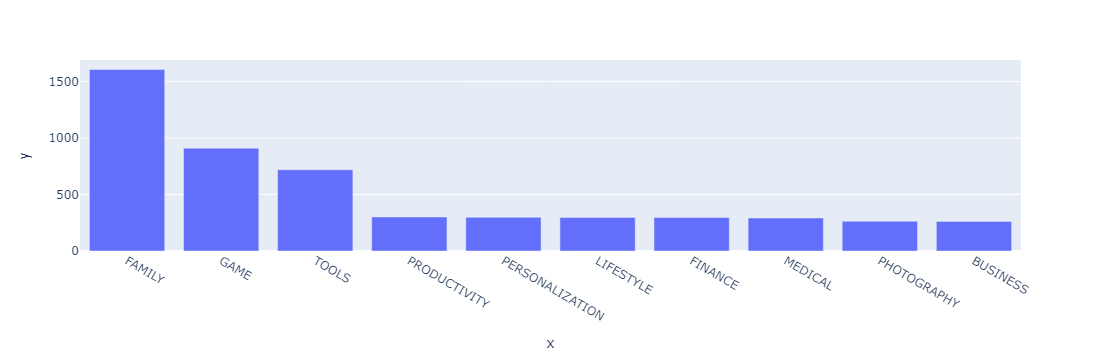

In [186]:
bar = px.bar(
    x = top_10_category.index,
    y=top_10_category.values
)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [244]:
category_installs = df_apps_clean.groupby("Category").agg({"Installs": pd.Series.sum})
category_installs.sort_values("Installs", ascending = True, inplace= True)
category_installs.head()

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100


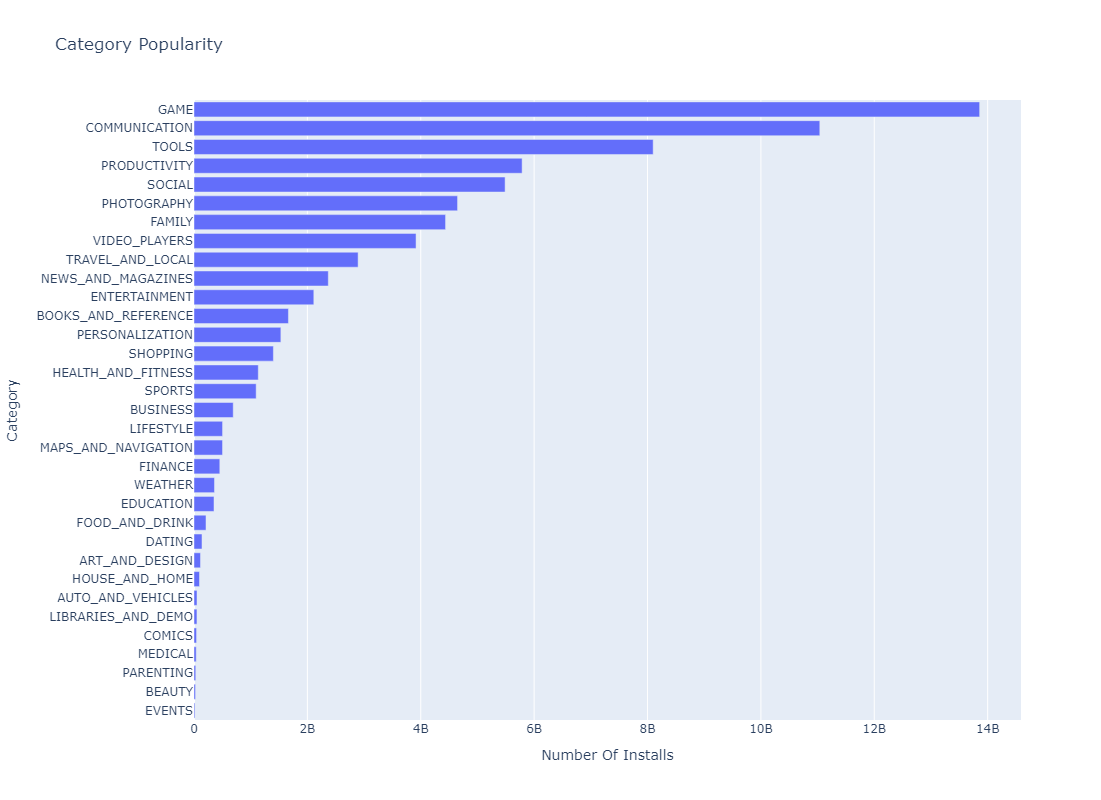

In [228]:
h_bar = px.bar(
    x= category_installs.Installs,
    y= category_installs.index,
    orientation="h",
    title="Category Popularity"
)
h_bar.update_layout(
    height=800,
    width=1000,
    yaxis_title = "Category",
    xaxis_title = "Number Of Installs"
)
h_bar.show()

In [250]:
df_app_installs = df_apps_clean.groupby("Category").agg({"App": pd.Series.count, "Installs": pd.Series.sum})
df_app_installs.sort_values("Installs", ascending=False, inplace=True)
df_app_installs.head()

,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475


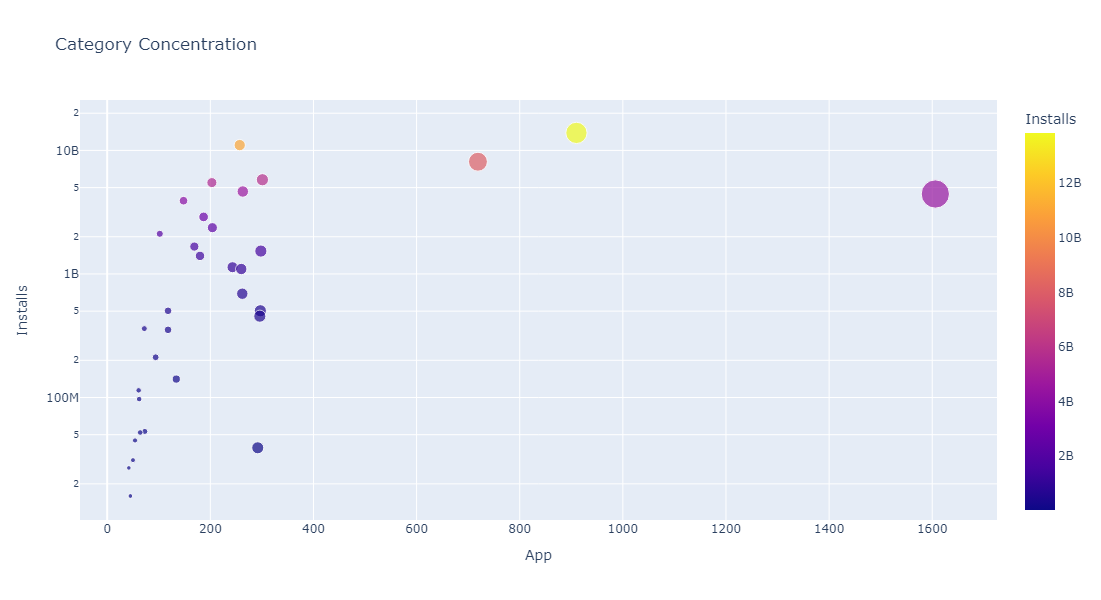

In [290]:
scatter_plot = px.scatter(df_app_installs, 
                          title="Category Concentration",
                          y=df_app_installs.Installs, 
                          x=df_app_installs.App,
                         size= df_app_installs.App,
                         hover_name=df_app_installs.index,
                         color= df_app_installs.Installs)
scatter_plot.update_layout(
   width = 1100,
    height = 600,
    yaxis = dict(type='log')
)
scatter_plot.show()

# Extracting Nested Data from a Column

In [298]:
df_apps_clean.Genres.value_counts()

Genres
Tools                                718
Entertainment                        467
Education                            429
Productivity                         301
Personalization                      298
                                    ... 
Adventure;Brain Games                  1
Travel & Local;Action & Adventure      1
Art & Design;Pretend Play              1
Music & Audio;Music & Video            1
Lifestyle;Pretend Play                 1
Name: count, Length: 114, dtype: int64

In [391]:
stacked_df = df_apps_clean.Genres.str.split(";", expand=True).stack()
stacked_df
num_geners = stacked_df.value_counts()
num_geners.head()

Tools            719
Education        587
Entertainment    498
Action           304
Productivity     301
Name: count, dtype: int64

# Colour Scales in Plotly Charts - Competition in Genres

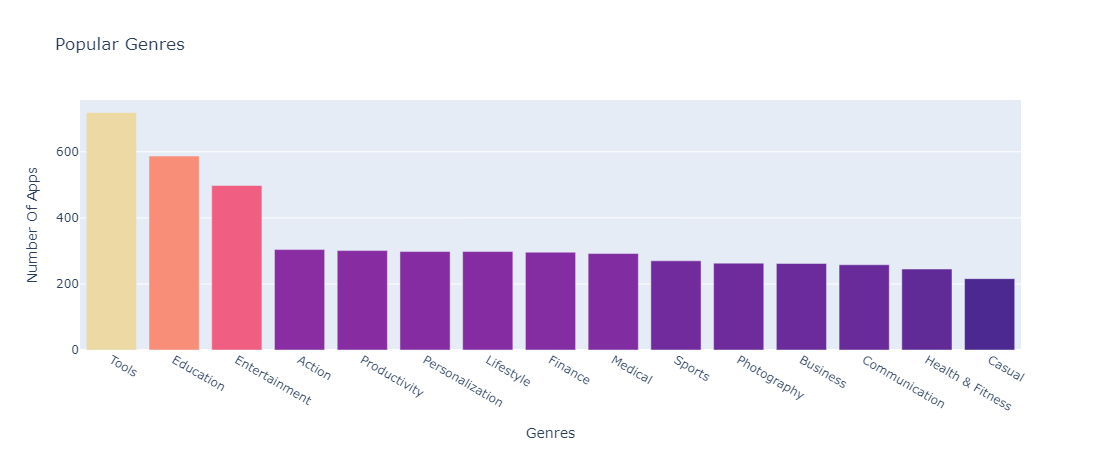

In [348]:
bar_generes = px.bar(
    x= num_geners.index[:15],
    y= num_geners.values[:15],
    title = "Popular Genres",
    hover_name=num_geners.index[:15],
    color=num_geners.values[:15],
     color_continuous_scale='Agsunset'
)
bar_generes.update_layout(
    height= 450,
    xaxis_title = "Genres",
    yaxis_title = "Number Of Apps",
    coloraxis_showscale=False
    
)
bar_generes.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [352]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({"App": pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

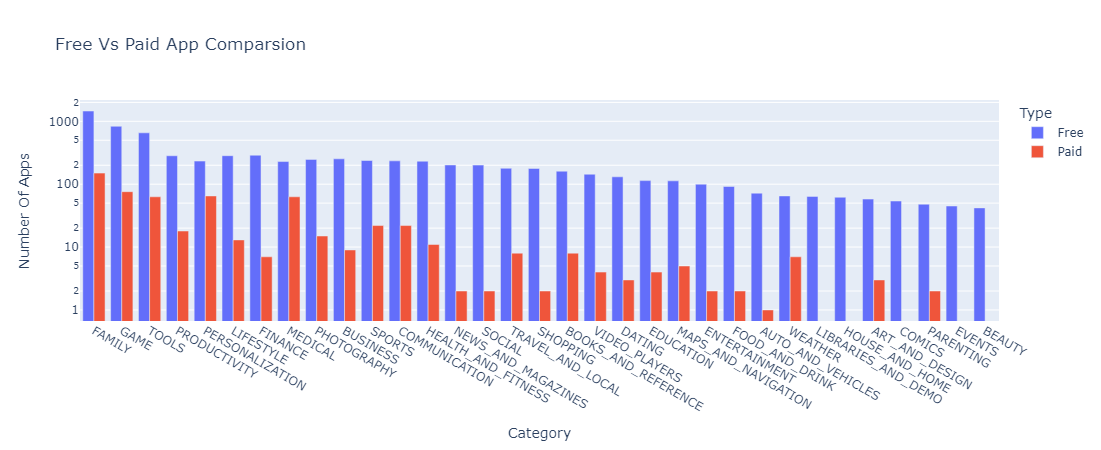

In [397]:
bar_paidvsfree = px.bar(
    df_free_vs_paid,
    title = "Free Vs Paid App Comparsion",
    x= df_free_vs_paid.Category,
    y= df_free_vs_paid.App,
    barmode= "group",
    color= df_free_vs_paid.Type
    
)
bar_paidvsfree.update_layout(
    height = 450,
    xaxis_title = "Category",
    yaxis_title = "Number Of Apps",
    xaxis = {'categoryorder': 'total descending'},
    yaxis = dict(type='log')
)
bar_paidvsfree.show()

# Plotly Box Plots: Lost Downloads for Paid Apps


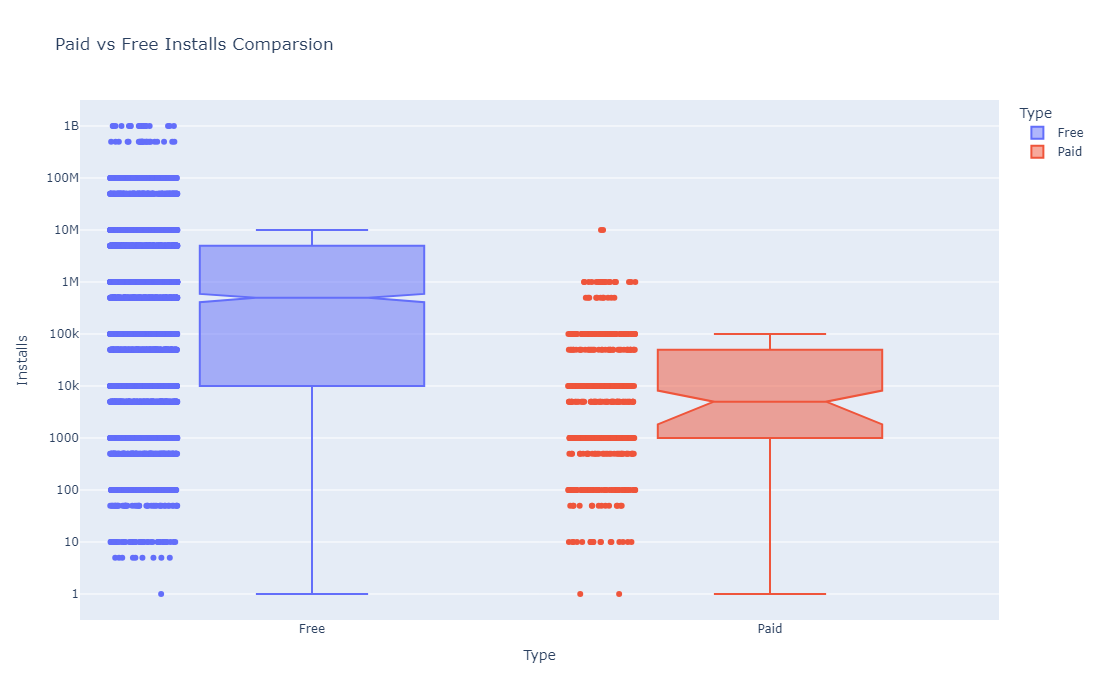

In [433]:
box = px.box(
    df_apps_clean,
    y= df_apps_clean.Installs,
    x=df_apps_clean.Type,
    color = df_apps_clean.Type,
    points = "all",
    notched= True,
    title = "Paid vs Free Installs Comparsion"
)
box.update_layout(
    height= 700,
    width = 1000,
    yaxis = dict(type="log")
)
box.show()

# Plotly Box Plots: Revenue by App Category

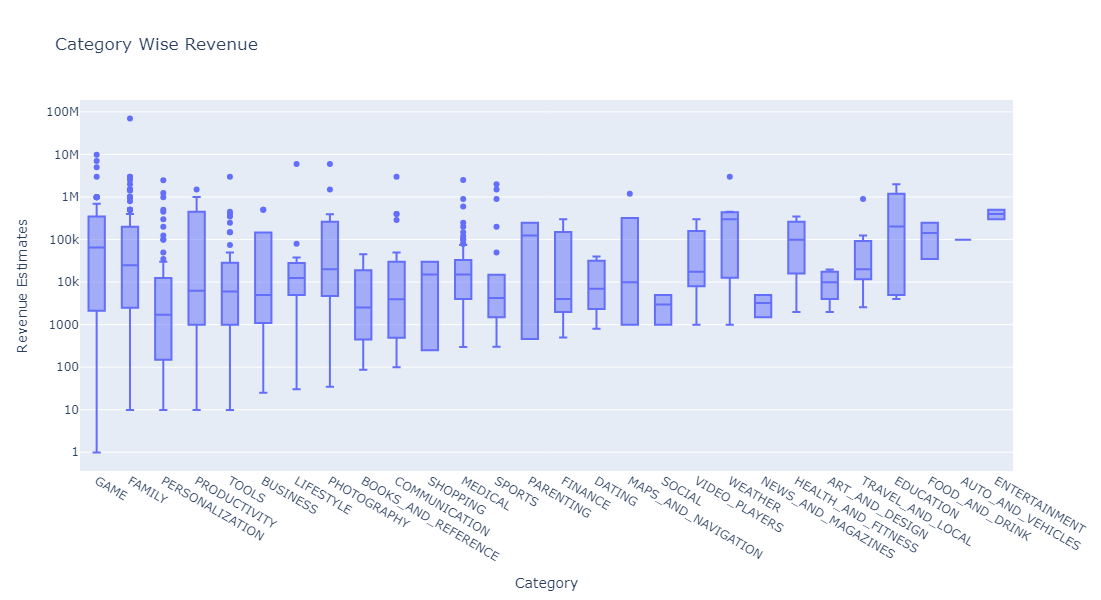

In [449]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(
    df_paid_apps,
    y= df_paid_apps["Revenue Estimates"],
    x=df_paid_apps.Category,
    title = "Category Wise Revenue"
)
box.update_layout(
    height = 600,
    xaxis={'categoryorder':'min ascending'},
    yaxis = dict(type="log")
)
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category



In [457]:
df_paid_apps.Price.median()

2.99

In [466]:
df_paid_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue Estimates
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
233,Chess of Blades (BL/Yaoi Game) (No VA),FAMILY,4.80,4,23.00,10,Paid,14.99,Teen,Casual,149.90
248,The DG Buddy,BUSINESS,3.70,3,11.00,10,Paid,2.49,Everyone,Business,24.90
291,AC DC Power Monitor,LIFESTYLE,5.00,1,1.20,10,Paid,3.04,Everyone,Lifestyle,30.40


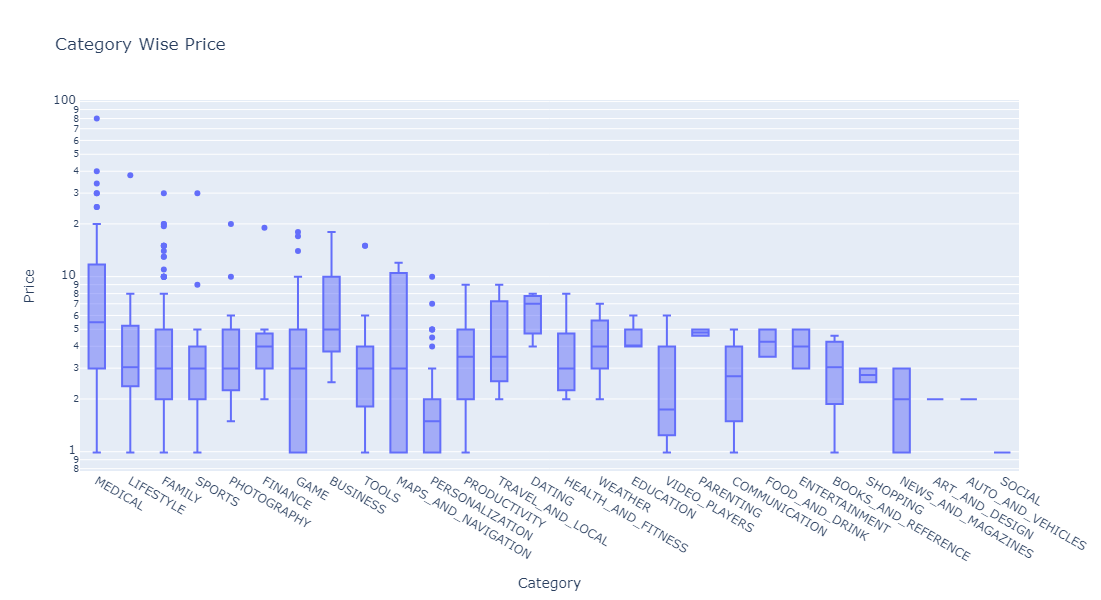

In [482]:
box_price = px.box(
    df_paid_apps,
    x= df_paid_apps.Category,
    y=df_paid_apps.Price,
    title = "Category Wise Price"
)
box_price.update_layout(
height = 600,
    xaxis={'categoryorder':'max descending'},
    yaxis = dict(type="log")
)
box_price.show()